Los datos pertenecen a un cliente que se encuentra interesado en anticipar que empleados se podrían llegar a ir de la compañía en base a datos históricos para tomar acciones de RRHH que le permitan mejorar la retención de sus empleados.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df.head()

,ID,nivel_de_satisfaccion,ultima_evaluacion,cantidad_proyectos,promedio_horas_mensuales_trabajadas,años_en_la_empresa,tuvo_un_accidente_laboral,promociones_ultimos_5_anios,area,salario,se_fue
0,2876.0,0.63,0.84,3,269,2,0,0,gestión de productos,bajo,no
1,7883.0,0.11,0.93,7,284,4,0,0,tecnica,bajo,si
2,4089.0,0.60,0.42,2,109,6,0,0,ventas,bajo,no
3,8828.0,0.38,0.49,4,196,3,0,1,dirección,alto,no
4,9401.0,0.11,0.83,6,244,4,0,0,contabilidad,bajo,si


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   8000 non-null   float64
 1   nivel_de_satisfaccion                8000 non-null   float64
 2   ultima_evaluacion                    8000 non-null   float64
 3   cantidad_proyectos                   8000 non-null   int64  
 4   promedio_horas_mensuales_trabajadas  8000 non-null   int64  
 5   años_en_la_empresa                   8000 non-null   int64  
 6   tuvo_un_accidente_laboral            8000 non-null   int64  
 7   promociones_ultimos_5_anios          8000 non-null   int64  
 8   area                                 8000 non-null   object 
 9   salario                              8000 non-null   object 
 10  se_fue                               8000 non-null   object 
dtypes: float64(3), int64(5), objec

In [4]:
df.describe()

,ID,nivel_de_satisfaccion,ultima_evaluacion,cantidad_proyectos,promedio_horas_mensuales_trabajadas,años_en_la_empresa,tuvo_un_accidente_laboral,promociones_ultimos_5_anios
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5001.856375,0.611250,0.717285,3.802625,201.246125,3.495375,0.148750,0.022375
std,2879.555515,0.248972,0.171529,1.234447,50.055105,1.476483,0.355864,0.147909
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,2513.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,4994.500000,0.640000,0.720000,4.000000,201.000000,3.000000,0.000000,0.000000
75%,7498.250000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,10000.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [5]:
df.area.unique()

array(['gestión de productos', 'tecnica', 'ventas', 'dirección',
       'contabilidad', 'ImásD', 'marketing', 'RRHH', 'soporte', 'TI'],
      dtype=object)

In [6]:
df.salario.unique()

array(['bajo', 'alto', 'medio'], dtype=object)

In [7]:
df.se_fue.unique()

array(['no', 'si'], dtype=object)

In [8]:
df.isnull().sum()

ID                                     0
nivel_de_satisfaccion                  0
ultima_evaluacion                      0
cantidad_proyectos                     0
promedio_horas_mensuales_trabajadas    0
años_en_la_empresa                     0
tuvo_un_accidente_laboral              0
promociones_ultimos_5_anios            0
area                                   0
salario                                0
se_fue                                 0
dtype: int64

In [9]:
def get_positive_prop(feature):
    ''' Obtiene la proporcion de los que se fueron por cada categoria'''
    d ={}
    for i,value in enumerate(df[feature].unique()):
        p = len(df[(df[feature]==value) & (df['se_fue']=='si')])
        n= len(df[(df[feature]==value) & (df['se_fue']=='no')])
        value_prop= p/(p+n)
        value_prop = round(value_prop*100,2)
        d[f'{value}'] = value_prop
    d = sorted(d.items(), key=lambda x: x[1], reverse=True)

    for i in d:
        print(f'{i[0]}: {i[1]}%')

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

### Area vs Target

<AxesSubplot:xlabel='area', ylabel='count'>

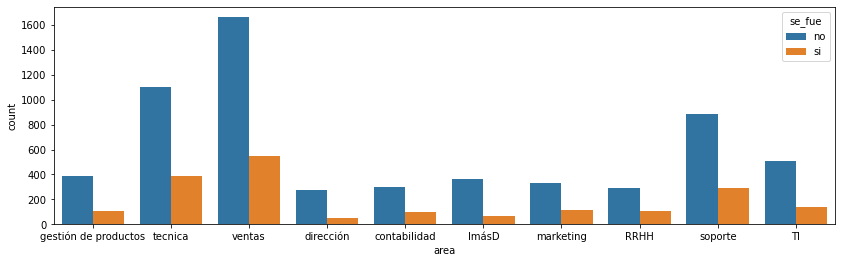

In [11]:
fig_dims = (14, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= df.area, hue = df.se_fue , ax=ax)

In [12]:
get_positive_prop('area')

RRHH: 26.57%
tecnica: 25.86%
marketing: 25.34%
ventas: 24.69%
soporte: 24.53%
contabilidad: 24.05%
gestión de productos: 21.34%
TI: 21.18%
ImásD: 15.31%
dirección: 15.08%


Los empleados que ocupan cargos de direccion son los menos propensos a irse en comparacion con el resto de los cargos

### Salario vs Target

<AxesSubplot:xlabel='salario', ylabel='count'>

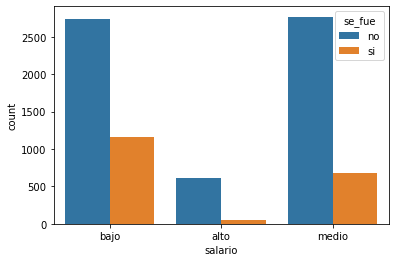

In [13]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= df.salario, hue = df.se_fue , ax=ax)

In [14]:
get_positive_prop('salario')

bajo: 29.71%
medio: 19.84%
alto: 7.03%


Los empleados con salarios bajos son los mas propensos a dejar la empresa con una proporcion de casi el 30% sobre el total de esa categoria

### Promociones vs Target

<AxesSubplot:xlabel='promociones_ultimos_5_anios', ylabel='Count'>

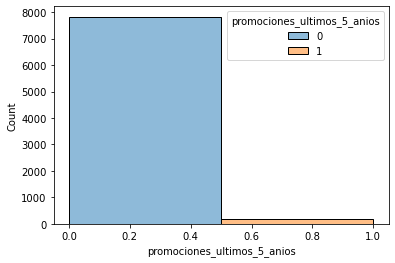

In [15]:
sns.histplot(binwidth=0.5, x="promociones_ultimos_5_anios", hue="promociones_ultimos_5_anios", data=df, stat='count')

In [16]:
len(df.loc[df['promociones_ultimos_5_anios']==1])/len(df['promociones_ultimos_5_anios'])

0.022375

Solo el 2% de los empleados tienen promociones en los ultimos 5 anios

<AxesSubplot:xlabel='promociones_ultimos_5_anios', ylabel='count'>

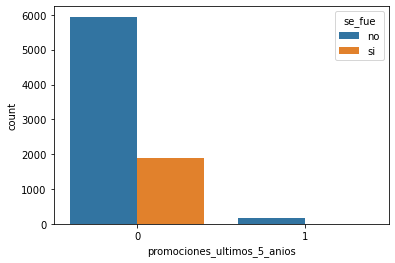

In [17]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= df.promociones_ultimos_5_anios, hue = df.se_fue , ax=ax)

In [18]:
get_positive_prop('promociones_ultimos_5_anios') 

0: 24.01%
1: 5.59%


De los empleados con promociones en los ultimos 5 anios solo el 6% se fue

### Accidentes vs Target

<AxesSubplot:xlabel='tuvo_un_accidente_laboral', ylabel='count'>

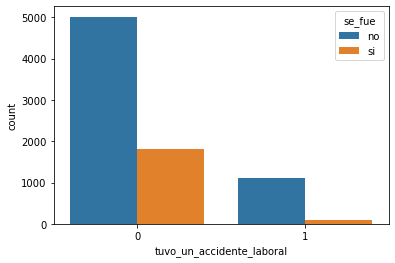

In [19]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= df.tuvo_un_accidente_laboral, hue = df.se_fue , ax=ax)

In [20]:
get_positive_prop('tuvo_un_accidente_laboral')

0: 26.43%
1: 7.39%


<ipython-input-21-cce6a39cc350>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  sns.heatmap(df.drop('ID',1).corr(),annot=True)


<AxesSubplot:>

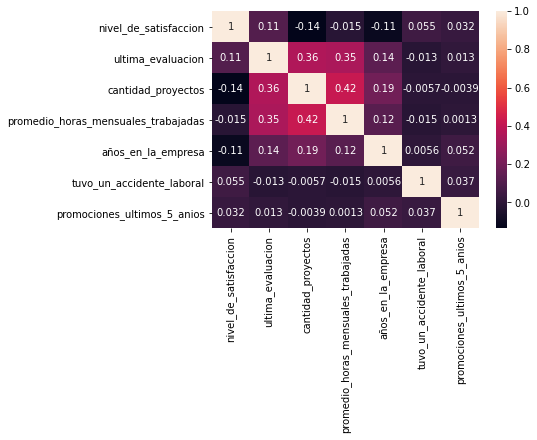

In [21]:
sns.heatmap(df.drop('ID',1).corr(),annot=True)

### Nivel de satisfaccion

/Users/foxtrot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nivel_de_satisfaccion', ylabel='Density'>

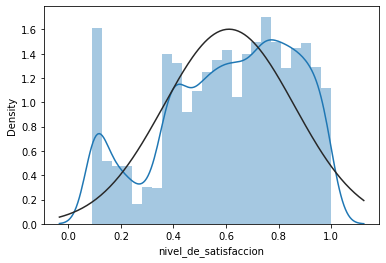

In [22]:
from scipy.stats import norm
sns.distplot(df.nivel_de_satisfaccion, fit=norm)

<AxesSubplot:xlabel='nivel_de_satisfaccion'>

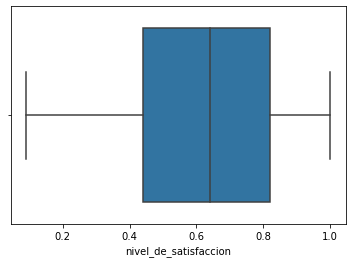

In [23]:
sns.boxplot(data= df , x='nivel_de_satisfaccion')

In [24]:
def get_satisf_bin(column):
    ''' crea categorias de acuerdo al nivel de satisfaccion'''
    if column >= 0 and column < 0.2:
        return 'muy insatisfecho'
    elif column >= 0.2 and column < 0.4:
        return 'insatisfecho'
    elif column >= 0.4 and column < 0.6:
        return 'neutral'
    elif column >= 0.6 and column < 0.8:
        return 'satisfecho'
    elif column >= 0.8 and column <= 1:
        return 'muy satisfecho'


In [25]:
df['satisfaccion'] = df.nivel_de_satisfaccion.apply(lambda x: get_satisf_bin(x))
df.head()

,ID,nivel_de_satisfaccion,ultima_evaluacion,cantidad_proyectos,promedio_horas_mensuales_trabajadas,años_en_la_empresa,tuvo_un_accidente_laboral,promociones_ultimos_5_anios,area,salario,se_fue,satisfaccion
0,2876.0,0.63,0.84,3,269,2,0,0,gestión de productos,bajo,no,satisfecho
1,7883.0,0.11,0.93,7,284,4,0,0,tecnica,bajo,si,muy insatisfecho
2,4089.0,0.60,0.42,2,109,6,0,0,ventas,bajo,no,satisfecho
3,8828.0,0.38,0.49,4,196,3,0,1,dirección,alto,no,insatisfecho
4,9401.0,0.11,0.83,6,244,4,0,0,contabilidad,bajo,si,muy insatisfecho


<AxesSubplot:xlabel='satisfaccion', ylabel='count'>

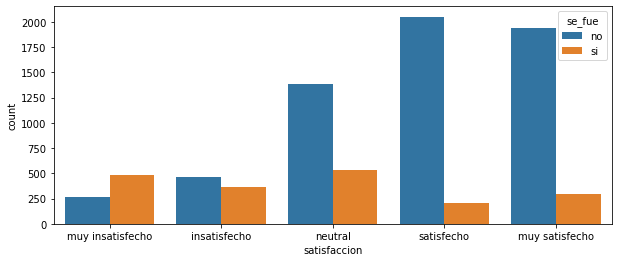

In [26]:
order = ['muy insatisfecho','insatisfecho','neutral','satisfecho','muy satisfecho']
fig,ax = plt.subplots(figsize=(10,4))
sns.countplot(data=df, x='satisfaccion', hue='se_fue', order=order)

In [27]:
get_positive_prop('satisfaccion')

muy insatisfecho: 64.24%
insatisfecho: 43.75%
neutral: 27.98%
muy satisfecho: 13.15%
satisfecho: 9.21%


El nivel de satisfaccion es un factor determinante para los empleados que dejan la empresa, se puede ver que el 64,2% de los empleados muy insatisfechos se van, seguido por los insatisfechos con un porcentake de 43,7% 

### Ultima evaluacion

<AxesSubplot:xlabel='ultima_evaluacion'>

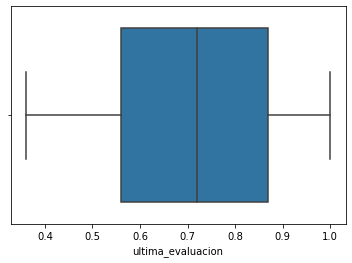

In [28]:
sns.boxplot(data= df , x='ultima_evaluacion')

In [29]:
def get_eval_bin(column):
    ''' crea categorias de acuerdo al resultado de la evaluacion'''
    if column >= 0 and column < 0.2:
        return 'deficiente'
    elif column >= 0.2 and column < 0.4:
        return 'malo'
    elif column >= 0.4 and column < 0.6:
        return 'regular'
    elif column >= 0.6 and column < 0.8:
        return 'bueno'
    elif column >= 0.8 and column <= 1:
        return 'muy bueno'

In [30]:
df['evaluacion'] = df.ultima_evaluacion.apply(lambda x: get_eval_bin(x))
df.head()

,ID,nivel_de_satisfaccion,ultima_evaluacion,cantidad_proyectos,promedio_horas_mensuales_trabajadas,años_en_la_empresa,tuvo_un_accidente_laboral,promociones_ultimos_5_anios,area,salario,se_fue,satisfaccion,evaluacion
0,2876.0,0.63,0.84,3,269,2,0,0,gestión de productos,bajo,no,satisfecho,muy bueno
1,7883.0,0.11,0.93,7,284,4,0,0,tecnica,bajo,si,muy insatisfecho,muy bueno
2,4089.0,0.60,0.42,2,109,6,0,0,ventas,bajo,no,satisfecho,regular
3,8828.0,0.38,0.49,4,196,3,0,1,dirección,alto,no,insatisfecho,regular
4,9401.0,0.11,0.83,6,244,4,0,0,contabilidad,bajo,si,muy insatisfecho,muy bueno


<AxesSubplot:xlabel='evaluacion', ylabel='count'>

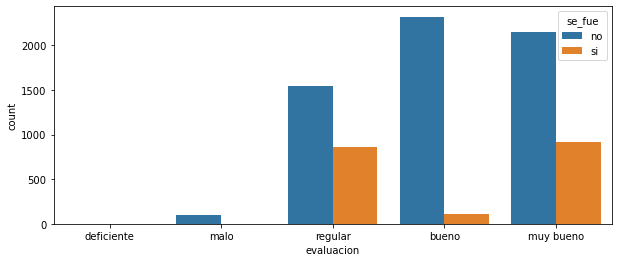

In [31]:
order = ['deficiente','malo','regular','bueno','muy bueno']
fig,ax = plt.subplots(figsize=(10,4))
sns.countplot(data=df, x='evaluacion', hue='se_fue', order=order)

In [32]:
get_positive_prop('evaluacion')

regular: 35.69%
muy bueno: 29.85%
bueno: 4.68%
malo: 0.0%


Casi el 30% de los que tienen muy buenos resultados en la evaluacion dejaron la empresa, se podria interpretar como empleados sobrecalificados o en busca de un mejor salario

### Años en la empresa

<AxesSubplot:xlabel='años_en_la_empresa'>

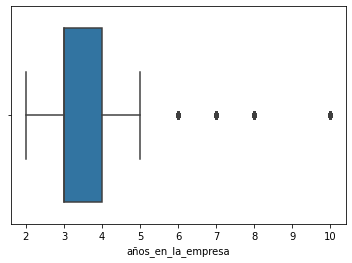

In [33]:
#anios en la empresa
sns.boxplot(data= df , x='años_en_la_empresa')

<AxesSubplot:xlabel='años_en_la_empresa', ylabel='count'>

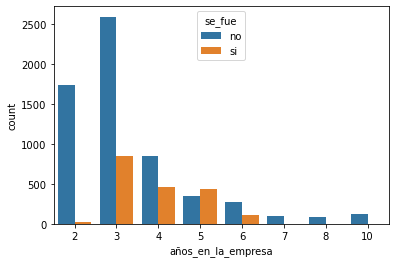

In [34]:
sns.countplot(data=df,x='años_en_la_empresa',hue='se_fue')

In [35]:
get_positive_prop('años_en_la_empresa')

5: 55.13%
4: 35.21%
6: 30.13%
3: 24.64%
2: 1.53%
10: 0.0%
7: 0.0%
8: 0.0%


Los empleados con 7 años o mas en la empresa no suelen irse. La mayor parte de las deserciones se observa en los empleados que tienen de 3 a 6 anios en la empresa

### Composicion del target de acuerdo a los salarios

<AxesSubplot:xlabel='se_fue', ylabel='Count'>

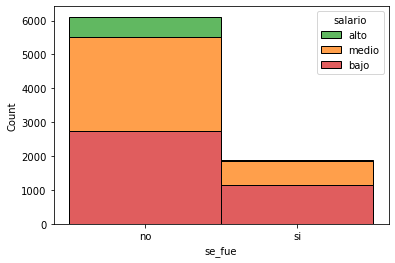

In [36]:
#composicion del target de acuerdo a los salarios
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
palette = ['tab:green', 'tab:orange', 'tab:red']
hue_order = ['alto', 'medio', 'bajo']
sns.histplot(binwidth=0.5, x="se_fue", hue="salario", data=df, stat="count", multiple="stack",hue_order=hue_order,palette=palette)


Los empleados que tienen salarios altos no suelen dejar la empresa

### Composicion del target de acuerdo al nivel de satisfaccion

<AxesSubplot:xlabel='se_fue', ylabel='Count'>

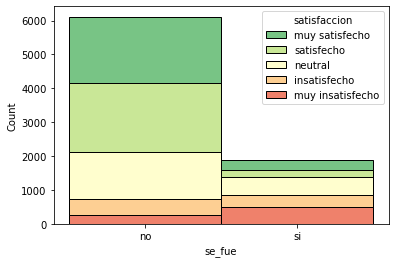

In [37]:
palette = sns.color_palette('RdYlGn_r',5)
hue_order = ['muy satisfecho', 'satisfecho', 'neutral','insatisfecho', 'muy insatisfecho']
sns.histplot(binwidth=0.5, x="se_fue", hue="satisfaccion", data=df, stat="count", multiple="stack",hue_order=hue_order,palette=palette)



### Composicion del target de acuerdo a los resultados de la evaluacion

<AxesSubplot:xlabel='se_fue', ylabel='Count'>

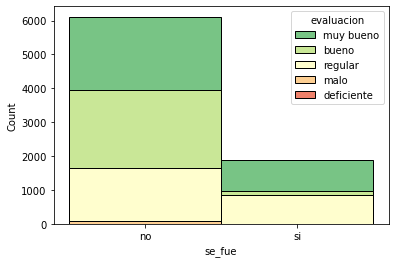

In [38]:
palette = sns.color_palette('RdYlGn_r',5)
hue_order = ['muy bueno','bueno' ,'regular','malo', 'deficiente', ]
sns.histplot(binwidth=0.5, x="se_fue", hue="evaluacion", data=df, stat="count", multiple="stack",hue_order=hue_order,palette=palette)


### Cantidad de proyectos y nivel de satisfaccion

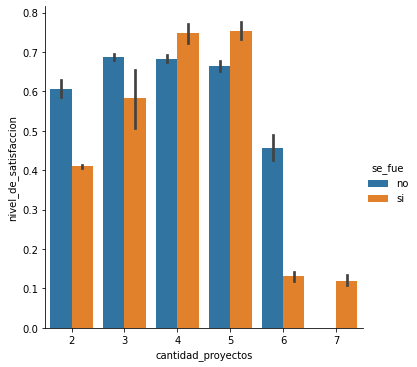

In [39]:
sns.catplot(x='cantidad_proyectos', y='nivel_de_satisfaccion', hue='se_fue', data=df, kind='bar')

### Cantidad de Proyectos

<AxesSubplot:xlabel='cantidad_proyectos', ylabel='count'>

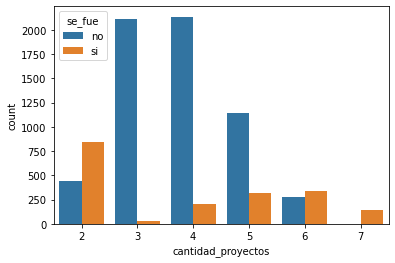

In [40]:
sns.countplot(data=df,x='cantidad_proyectos',hue='se_fue')

In [41]:
get_positive_prop('cantidad_proyectos')

7: 100.0%
2: 65.45%
6: 55.22%
5: 21.88%
4: 8.92%
3: 1.54%


### Cantidad de proyectos y promedio de horas trabajadas

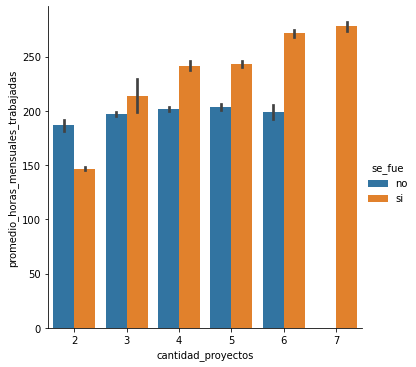

In [42]:
sns.catplot(x='cantidad_proyectos', y='promedio_horas_mensuales_trabajadas', hue='se_fue', data=df, kind='bar')


Aquellos empleados con mas de 200 horas mensuales trabajadas y mas de 3 proyectos suelen dejar la empresa

### Ultima evaluacion y promedio de horas trabajadas

<AxesSubplot:xlabel='ultima_evaluacion', ylabel='promedio_horas_mensuales_trabajadas'>

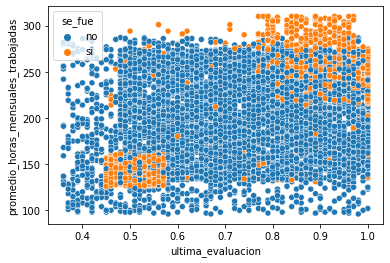

In [43]:
sns.scatterplot(data=df, x='ultima_evaluacion', y='promedio_horas_mensuales_trabajadas',hue='se_fue')

Los empleados con muy buenos resultados en la evaluacion y que ademas trabajan muchas horas suelen dejar la empresa (distribucion de los puntos naranjas en la esquina superior derecha), 
Asi tambien los empleados con bajo rendimiento en la evaluacion y pocas horas trabajadas al mes suelen irse (distribucion de los puntos naranjas en la esquina inferior izquierda).
Esto lleva a pensar que la sobrecalificacion y la subcalificacion para un puesto de trabajo puede estar relacionada con la desercion

## Feature Engineering

In [44]:
y = df['se_fue']
df.drop(columns=['ID','satisfaccion','evaluacion','se_fue'],inplace=True)
df.head()

,nivel_de_satisfaccion,ultima_evaluacion,cantidad_proyectos,promedio_horas_mensuales_trabajadas,años_en_la_empresa,tuvo_un_accidente_laboral,promociones_ultimos_5_anios,area,salario
0,0.63,0.84,3,269,2,0,0,gestión de productos,bajo
1,0.11,0.93,7,284,4,0,0,tecnica,bajo
2,0.60,0.42,2,109,6,0,0,ventas,bajo
3,0.38,0.49,4,196,3,0,1,dirección,alto
4,0.11,0.83,6,244,4,0,0,contabilidad,bajo


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state=0)

### Scaling & Categorical Encoding

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['cantidad_proyectos','promedio_horas_mensuales_trabajadas','años_en_la_empresa']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['area','salario']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [47]:
data_prepared = preprocessor.fit_transform(X_train)

### Oversampling

In [48]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [49]:


print(f'Original dataset shape {Counter(y_train)}')
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(data_prepared, y_train)
#train_output_new = train_output_new['yes']
print(f'Nuevo dataset shape {Counter(train_output_new)}')
#train_input_new = pd.DataFrame(train_input_new, columns = list(features.columns))

Original dataset shape Counter({'no': 4912, 'si': 1488})
Nuevo dataset shape Counter({'no': 4912, 'si': 4912})


In [50]:
data_prepared = preprocessor.fit_transform(X_train)

## Model Selection

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

lr_cv = LogisticRegression(random_state=0)
rf_cv=RandomForestClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
xgb_cv=xgb.XGBClassifier(eval_metric='mlogloss')
cv_models=[lr_cv,rf_cv,knn_cv,svc_cv,xgb_cv]


for i,model in enumerate(cv_models):
    print(f'''{model.__class__.__name__} Test Acurracy {cross_val_score(model, train_input_new, train_output_new, cv=3, scoring ='accuracy').mean()}''')
    

LogisticRegression Test Acurracy 0.6577764202810018
RandomForestClassifier Test Acurracy 0.9616256075704798
KNeighborsClassifier Test Acurracy 0.9349558943079953
SVC Test Acurracy 0.9350577065661912
XGBClassifier Test Acurracy 0.9654935407505506


Los modelos con mejores resultados son Random Forest y XGBoost

In [53]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()


In [54]:
y = np.array([number[0] for number in lb.fit_transform(train_output_new)])

In [55]:
y

array([0, 1, 0, ..., 1, 1, 1])

In [56]:
from sklearn.model_selection import cross_val_score

#accuracy
scores = cross_val_score(rf_cv,train_input_new,y,scoring='accuracy', cv=10)

In [57]:
acc = scores.mean()
acc

0.9643782386103474

In [58]:
#recall
scores = cross_val_score(rf_cv,train_input_new,y,scoring='recall', cv=10)

In [59]:
recall = scores.mean()
recall

0.9645836437997781

In [60]:
#precision
scores = cross_val_score(rf_cv,train_input_new,y,scoring='precision', cv=10)

In [61]:
precision = scores.mean()
precision

0.9637672210730679

In [62]:
#f1 score
scores = cross_val_score(rf_cv,train_input_new,y,scoring='f1', cv=10)

In [63]:
f1 = scores.mean()
f1

0.9629951013348459

In [64]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(rf_cv, train_input_new, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)

In [65]:
cmtx = pd.DataFrame(
    confusion_matrix(y, y_pred), 
    index=['actual:0', 'actual:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)

          pred:0  pred:1
actual:0    4733     179
actual:1     172    4740


### Hyperparameter Tunning

#### Random Forest

In [66]:
from sklearn.model_selection import RandomizedSearchCV
# Numero de arboles
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Numero de features a considerar en cada split
max_features = ['auto', 'sqrt']
# Numero maximo de niveles
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimo numero de samples requeridos para dividir un nodo
min_samples_split = [2, 5, 10]
# Minimo numero de samples requeridos en cada leaf node
min_samples_leaf = [1, 2, 4]
# Metodo para seleccionar samples para entrenar cada arbol(with or without replacement)
bootstrap = [True, False]

In [67]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [68]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [69]:

rf_random = RandomizedSearchCV(estimator = rf_cv, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)



In [70]:
rf_random.fit(train_input_new, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [71]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [72]:
rf_best=rf_random.best_estimator_

In [73]:
test_prepared = preprocessor.fit_transform(X_test)

In [74]:
rf_prd = rf_best.predict(test_prepared)

In [75]:
rf_prd = np.array([number[0] for number in lb.fit_transform(rf_prd)])
y_test = np.array([number[0] for number in lb.fit_transform(y_test)])

In [76]:
cmtx = pd.DataFrame(
    confusion_matrix(y_test, rf_prd), 
    index=['actual:0', 'actual:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)

          pred:0  pred:1
actual:0    1075     125
actual:1      38     362


In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score
print(f"Accuracy is {accuracy_score(y_test, rf_prd):.2f}")
print(f"Precision is {precision_score(y_test, rf_prd):.2f}")
print(f"Recall is {recall_score(y_test, rf_prd):.2f}")
print(f"f1Score is {f1_score(y_test, rf_prd):.2f}")

Accuracy is 0.90
Precision is 0.74
Recall is 0.91
f1Score is 0.82


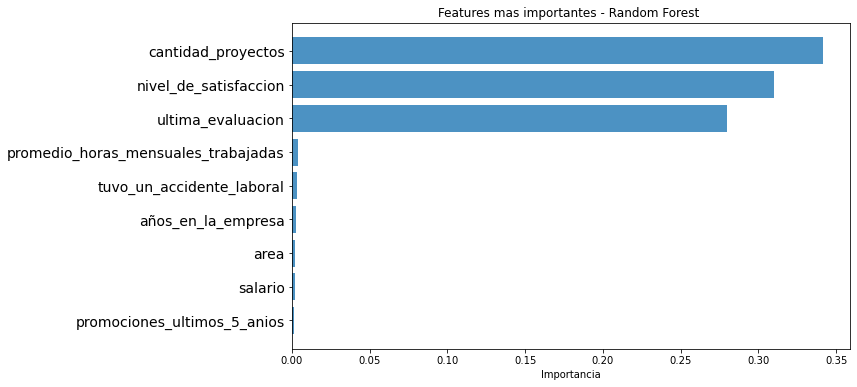

In [78]:
feature_names = X_train.columns
feature_imports = rf_best.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importancia')
plt.title('Features mas importantes - Random Forest ')
plt.show()

#### XGBoost

In [79]:
data_prepared = preprocessor.fit_transform(X_train)

In [80]:
xgb_model = xgb.XGBClassifier(max_depth=10,n_estimators=100)
xgb_model.fit(data_prepared,y_train)

[10:11:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
xgb_pred=xgb_model.predict(test_prepared)
xgb_pred

array(['si', 'no', 'no', ..., 'si', 'no', 'no'], dtype=object)

In [82]:
xgb_pred = np.array([number[0] for number in lb.fit_transform(xgb_pred)])
y_test = np.array([number[0] for number in lb.fit_transform(y_test)])

In [83]:
cmtx = pd.DataFrame(
    confusion_matrix(y_test, xgb_pred), 
    index=['actual:0', 'actual:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)

          pred:0  pred:1
actual:0    1163      37
actual:1      57     343


In [84]:
print(f"Accuracy is {accuracy_score(y_test, xgb_pred):.2f}")
print(f"Precision is {precision_score(y_test, xgb_pred):.2f}")
print(f"Recall is {recall_score(y_test, xgb_pred):.2f}")
print(f"f1Score is {f1_score(y_test, xgb_pred):.2f}")

Accuracy is 0.94
Precision is 0.90
Recall is 0.86
f1Score is 0.88


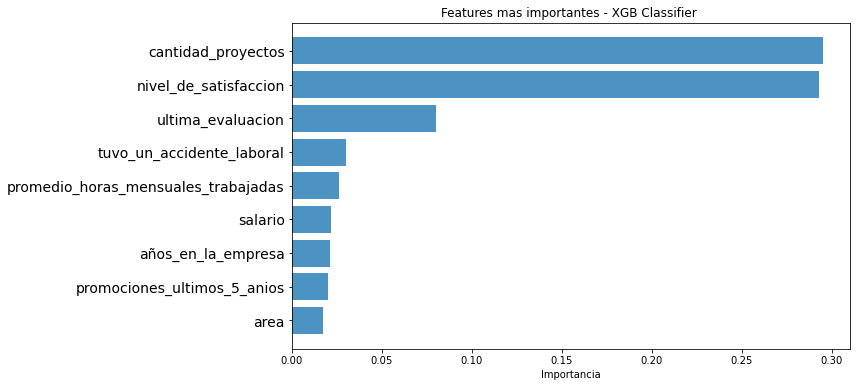

In [85]:
feature_names = X_train.columns
feature_imports = xgb_model.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importancia')
plt.title('Features mas importantes - XGB Classifier ')
plt.show()

In [116]:
lambd = [0.01,0.05,0.1,0.2,0.3,0.5,0.7,1]
max_depth=[5,10,20,30]
n_estimators=[50,100,200,300]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'lambda':lambd}

In [117]:
xgboost = xgb.XGBClassifier()

In [118]:
xgb_random = RandomizedSearchCV(estimator = xgboost, param_distributions = random_grid, n_iter = 25, cv = 3, verbose=2, random_state=42, n_jobs = -1)



In [128]:
len(data_prepared)

6400

In [130]:
xgb_random.fit(data_prepared, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[11:56:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                    

In [131]:
xgb_random.best_params_

{'n_estimators': 50, 'max_depth': 5, 'lambda': 0.7}

In [132]:
xgb_best=xgb_random.best_estimator_

In [133]:
xgb_prd = xgb_best.predict(test_prepared)

In [134]:
xgb_prd = np.array([number[0] for number in lb.fit_transform(xgb_prd)])
y_test = np.array([number[0] for number in lb.fit_transform(y_test)])

In [135]:
cmtx = pd.DataFrame(
    confusion_matrix(y_test, xgb_prd), 
    index=['actual:0', 'actual:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)

          pred:0  pred:1
actual:0    1166      34
actual:1      45     355


In [136]:
print(f"Accuracy is {accuracy_score(y_test, xgb_prd):.2f}")
print(f"Precision is {precision_score(y_test, xgb_prd):.2f}")
print(f"Recall is {recall_score(y_test, xgb_prd):.2f}")
print(f"f1Score is {f1_score(y_test, xgb_prd):.2f}")

Accuracy is 0.95
Precision is 0.91
Recall is 0.89
f1Score is 0.90


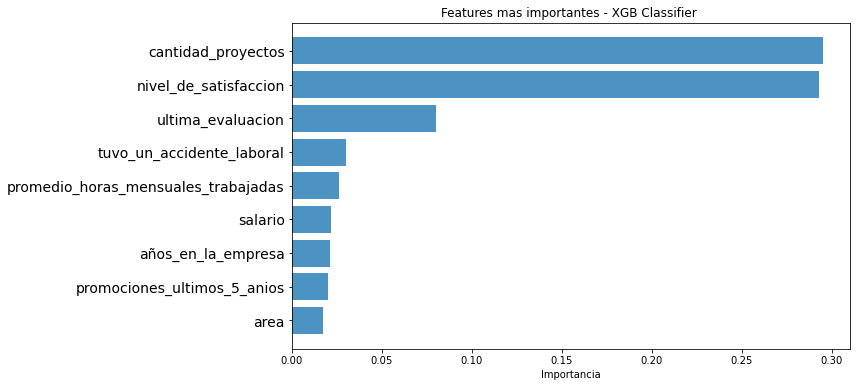

In [137]:
feature_names = X_train.columns
feature_imports = xgb_model.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importancia')
plt.title('Features mas importantes - XGB Classifier ')
plt.show()

## Recomendaciones

-	Incrementar el numero de promociones para aquellos empleados con mejor rendimiento

-	Promover proyectos mas desafiantes para los empleados que tienen un excelente rendimiento en la evaluacion, ya que estos suelen irse de la empresa por estar sobrecalificados para sus actuales tareas.

-	Promover politicas que mejoren el nivel de satisfaccion de los empleados, ya que este es un factor determinante en el resultado. Alentar a tomar proyectos mas atractivos a los empleados que muestran un nivel de satisfaccion por debajo de la media


#### Preparing the submission file

In [216]:
sub = pd.read_csv('submission.csv')
sub.head()

,ID,se_fue
0,2.0,NaN
1,4.0,NaN
2,9.0,NaN
3,14.0,NaN
4,15.0,NaN


In [217]:
df_test = pd.read_csv('test.csv')

In [218]:
y = df_test['se_fue']
df_test.drop(columns=['ID','se_fue'],inplace=True)
df_test.head()

,nivel_de_satisfaccion,ultima_evaluacion,cantidad_proyectos,promedio_horas_mensuales_trabajadas,años_en_la_empresa,tuvo_un_accidente_laboral,promociones_ultimos_5_anios,area,salario
0,0.40,0.57,2,152,3,0,0,ventas,bajo
1,0.54,0.52,3,115,3,0,0,contabilidad,bajo
2,0.72,0.87,5,223,5,0,0,ventas,bajo
3,0.65,0.67,3,245,3,0,0,ventas,medio
4,0.54,0.95,4,256,3,0,0,soporte,bajo


In [219]:
test_data_prepared = preprocessor.fit_transform(df_test)

In [220]:
len(test_data_prepared)

2000

In [221]:
xgb_prd = xgb_best.predict(test_data_prepared)

In [222]:
Counter(xgb_prd)

Counter({'si': 448, 'no': 1552})

In [223]:
#predicted
se_fue = pd.Series(xgb_prd,name='se_fue')

In [224]:
df_test = pd.read_csv('test.csv')
ID = df_test.ID

In [225]:
result = pd.concat([ID, se_fue], axis=1)
result.head()

,ID,se_fue
0,2.0,si
1,4.0,no
2,9.0,si
3,14.0,no
4,15.0,no


In [214]:
result.to_csv('my_submission.csv', sep=',', encoding='utf-8',index=False)